<a href="https://colab.research.google.com/github/gani0325/2021/blob/main/Image%20processing/%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC%EA%B3%B5%EB%B6%80/211022_DCT_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import data
import cv2

cat = data.chelsea()

In [ ]:
cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)

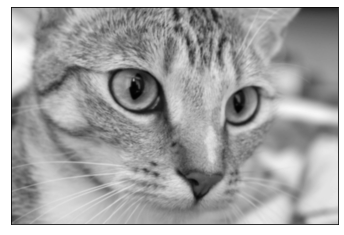

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(cat, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [ ]:
cat.dtype

dtype('uint8')

In [ ]:
import numpy as np

cat_f = np.float32(cat)/255.0

([], <a list of 0 Text yticklabel objects>)

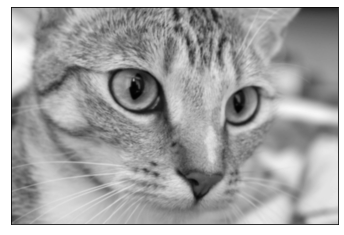

In [ ]:
plt.imshow(cat_f, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([])

(300, 451)


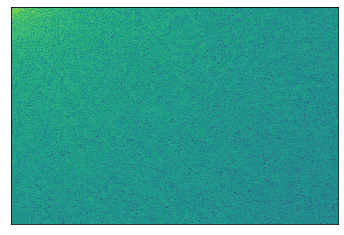

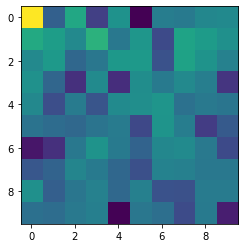

In [ ]:
dst = cv2.dct(cat_f)
print(dst.shape)
dst_log = np.log(np.abs(dst))
plt.figure()
plt.imshow(dst_log)
plt.xticks([]); plt.yticks([])
plt.figure()
plt.imshow(dst_log[0:10,0:10])

300
480
(300, 480)


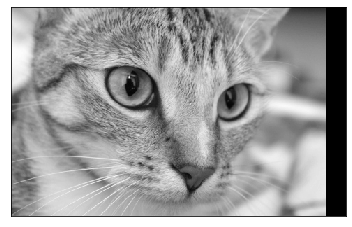

In [ ]:
plt.imshow(dst, cmap='gray', interpolation='bicubic')

def getOptimalDCTSize(N):
    return 2*cv2.getOptimalDFTSize(int((N+1)/2))
N1 = getOptimalDCTSize(cat_f.shape[0])
print(N1)
N2 = getOptimalDCTSize(cat_f.shape[1])
print(N2)

cat_r = cv2.copyMakeBorder(cat_f,0,N1-cat_f.shape[0],0,N2-cat_f.shape[1],cv2.BORDER_CONSTANT,value=0)
plt.imshow(cat_r, cmap='gray')
plt.xticks([]);plt.yticks([])
dst = cv2.dct(cat_r)
print(dst.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

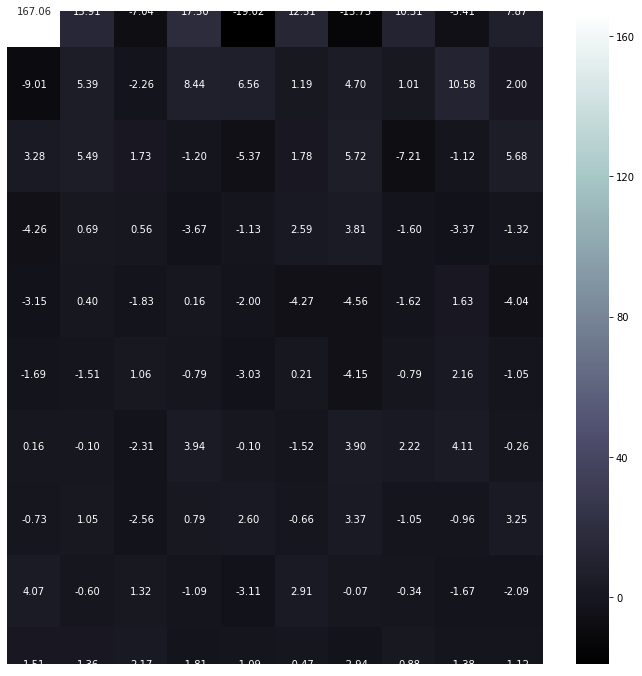

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dst[:10, :10], annot=True, 
            fmt=".2f", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

rmse[%] 0.065448022054187 %


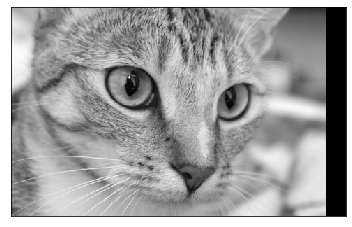

In [ ]:
ret = cv2.idct(dst)
plt.imshow(ret,cmap='gray')
plt.xticks([]);plt.yticks([])
print('rmse[%]',
      100*np.sqrt(np.mean(cat_r**2-ret**2))/np.mean(cat_r),
      '%')

300 480


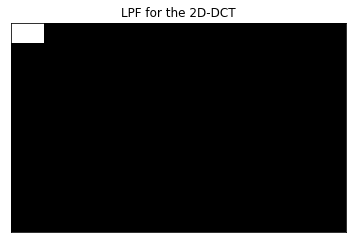

30 48
rmse[%] 11.540718586476844 %


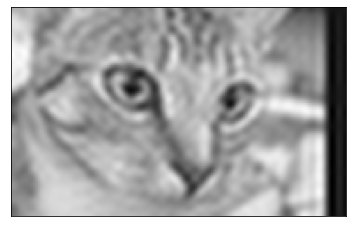

In [ ]:
height,width = dst.shape
print(height,width)
stop_band = 0.1 #1./1.5
#For rows:
Mr=np.ones((height,1))
Lr= int(height*stop_band)
Mr[Lr:height,0]=np.zeros( height-Lr)
#For columns:
Mc=np.ones((1,width))
Lc= int(width*stop_band)
Mc[0,Lc:width]=np.zeros(width-Lc);

#Together:
M=np.dot(Mr,Mc)
plt.imshow(M,cmap='gray')
plt.xticks([]);plt.yticks([])
plt.title("LPF for the 2D-DCT")
plt.show()
print(Lr,Lc)

##############################

dct_lp = M*dst
dct3 = cv2.idct(dct_lp)
plt.imshow(dct3,cmap='gray')
plt.xticks([]);plt.yticks([])
print('rmse[%]',
      100*np.sqrt(np.mean(cat_r**2-dct3**2))/np.mean(cat_r),
      '%')

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
def c(N, k, n):
    if (k == 0):
        return 1 / math.sqrt(N)
    else:
        return math.sqrt(2 / N) \
            * math.cos(
            (math.pi * (2 * n + 1) * k) / (2 * N)
        )

In [ ]:
def cMatrix(img):
    C = []
    for k in range(img.shape[1]):
        C.append([])
        for n in range(img.shape[0]):
            C[k].append(c(img.shape[1], k, n))
    return np.array(C)

In [ ]:
def dct_2d(img):
    C = cMatrix(img)
    U = img
    CT = C.transpose()

    return np.dot(np.dot(C, U), CT)

def idct_2d(img):
    C = cMatrix(img)
    U = img
    CT = C.transpose()

    return np.dot(np.dot(CT, U), C)

rmse[%]: 0.0017396264125568643 %


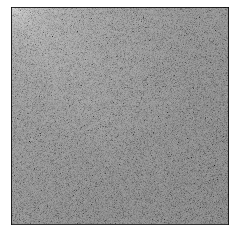

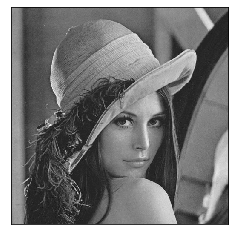

In [ ]:
lena = cv2.imread('../images/lena.png',0).astype(np.float32)/255
dct = dct_2d(lena)

plt.figure()
plt.xticks([]);plt.yticks([])
plt.imshow(np.log(abs(dct)),cmap='gray')
dst = idct_2d(dct)
print('rmse[%]:',100*np.sqrt(np.mean(lena**2-dst**2)),'%')
plt.figure()
plt.xticks([]);plt.yticks([])
plt.imshow(dst, cmap='gray')

In [ ]:
test = np.array([
    [40,24,15,19,28,24,19,15],
    [38,34,35,35,31,28,27,29],
    [40,47,49,40,33,29,32,43],
    [42,49,50,39,34,30,32,46],
    [40,47,46,35,31,32,35,43],
    [38,43,42,31,27,27,28,33],
    [39,33,25,17,14,15,19,26],
    [26,16,6 ,1 ,-4, 0, 7,18],
         ])

src = test/255.
ret = cv2.dct(src)*255.

In [ ]:
np.set_printoptions(
    formatter={'float_kind': lambda x: 
               "{0:0.2f}".format(x)
              }
)

In [ ]:
ret

array([[239.00, 31.43, 26.32, -12.54, 2.75, -5.14, 3.44, 0.70],
       [34.68, -2.07, -18.09, 7.02, 3.48, 0.42, -0.58, 1.59],
       [-70.84, 0.98, 7.64, 22.07, 8.71, 5.62, -1.56, -0.64],
       [5.47, 1.19, -5.59, 12.14, -1.81, 0.23, -0.84, 1.37],
       [-17.75, -3.34, 5.62, 5.49, 2.50, -1.05, -0.16, 0.02],
       [2.66, 4.24, 2.32, 2.73, 1.88, -2.13, -0.07, 1.23],
       [-3.13, 0.04, -0.56, -1.21, -1.17, -1.22, -0.14, 0.32],
       [1.37, -0.91, 3.06, 1.04, -0.65, -0.09, -0.72, 0.06]])

In [ ]:
C = cMatrix(test)

array([[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35],
       [0.49, 0.42, 0.28, 0.10, -0.10, -0.28, -0.42, -0.49],
       [0.46, 0.19, -0.19, -0.46, -0.46, -0.19, 0.19, 0.46],
       [0.42, -0.10, -0.49, -0.28, 0.28, 0.49, 0.10, -0.42],
       [0.35, -0.35, -0.35, 0.35, 0.35, -0.35, -0.35, 0.35],
       [0.28, -0.49, 0.10, 0.42, -0.42, -0.10, 0.49, -0.28],
       [0.19, -0.46, 0.46, -0.19, -0.19, 0.46, -0.46, 0.19],
       [0.10, -0.28, 0.42, -0.49, 0.49, -0.42, 0.28, -0.10]])

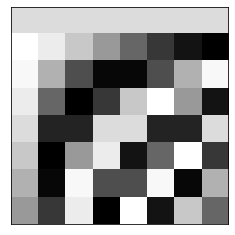

In [ ]:
plt.imshow(C,cmap='gray')
plt.xticks([]);plt.yticks([])
C

In [ ]:
CT = C.transpose()

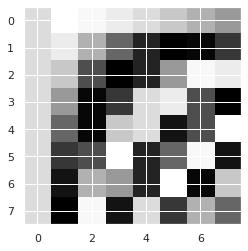

In [ ]:
plt.imshow(CT,cmap='gray')

In [ ]:
dct

array([[239.00, 31.43, 26.32, -12.54, 2.75, -5.14, 3.44, 0.70],
       [34.68, -2.07, -18.09, 7.02, 3.48, 0.42, -0.58, 1.59],
       [-70.84, 0.98, 7.64, 22.07, 8.71, 5.62, -1.56, -0.64],
       [5.47, 1.19, -5.59, 12.14, -1.81, 0.23, -0.84, 1.37],
       [-17.75, -3.34, 5.62, 5.49, 2.50, -1.05, -0.16, 0.02],
       [2.66, 4.24, 2.32, 2.73, 1.88, -2.13, -0.07, 1.23],
       [-3.13, 0.04, -0.56, -1.21, -1.17, -1.22, -0.14, 0.32],
       [1.37, -0.91, 3.06, 1.04, -0.65, -0.09, -0.72, 0.06]])

In [ ]:
dct2 = idct_2d(dct)

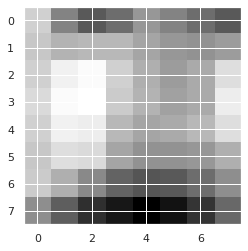

In [ ]:
plt.imshow(dct2,cmap='gray')

(-0.5, 7.5, 7.5, -0.5)

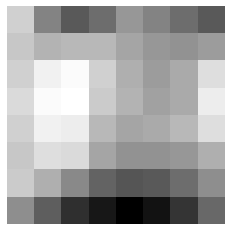

In [ ]:
plt.imshow(test,cmap='gray')
plt.axis('off')

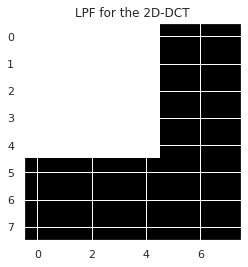

5 5


In [ ]:
height,width = test.shape

stop_band = 1./1.5
#For rows:
Mr=np.ones((height,1))
Lr= int(height*stop_band)
Mr[Lr:height,0]=np.zeros( height-Lr)
#For columns:
Mc=np.ones((1,width))
Lc= int(width*stop_band)
Mc[0,Lc:width]=np.zeros(width-Lc);

#Together:
M=np.dot(Mr,Mc)
plt.imshow(M,cmap='gray')
plt.title("LPF for the 2D-DCT")
plt.show()
print(Lr,Lc)

array([[1.44, 0.30, 0.41, -1.11, 0.82, -0.99, 0.34, -0.43],
       [-1.71, -2.18, 0.93, 1.19, -0.33, 0.73, 0.46, 0.23],
       [-0.39, 1.10, 0.24, -2.91, 0.33, 0.64, -1.95, 1.21],
       [1.10, 1.98, 1.07, -2.07, 3.22, 1.12, -4.58, 1.09],
       [-1.94, 0.70, 0.21, -2.57, 0.94, 1.58, -1.02, 2.57],
       [-2.74, -0.36, 1.00, -1.58, 0.67, -0.17, -3.04, -0.21],
       [4.30, 1.67, 0.02, -0.55, 1.23, 1.31, -0.39, 1.26],
       [-2.05, -1.12, 0.03, 0.72, -1.71, 0.87, -0.90, -0.01]])

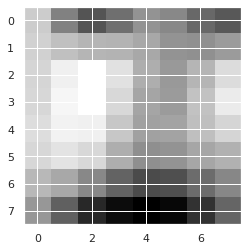

In [ ]:
dct_lp = M*dct
dct3 = idct_2d(dct_lp)
plt.imshow(dct3,cmap='gray')
test-dct3

4.400485041509799e-14

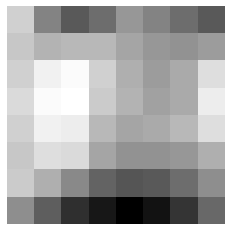

In [ ]:
dct2 = idct_2d(dct)
plt.imshow(dct2,cmap='gray')
plt.axis('off')

mae = np.mean(np.abs(dct2-test))

In [ ]:
?cv2.dct

Docstring:
dct(src[, dst[, flags]]) -> dst
.   @brief Performs a forward or inverse discrete Cosine transform of 1D or 2D array.
.   
.   The function cv::dct performs a forward or inverse discrete Cosine transform (DCT) of a 1D or 2D
.   floating-point array:
.   -   Forward Cosine transform of a 1D vector of N elements:
.   \f[Y = C^{(N)}  \cdot X\f]
.   where
.   \f[C^{(N)}_{jk}= \sqrt{\alpha_j/N} \cos \left ( \frac{\pi(2k+1)j}{2N} \right )\f]
.   and
.   \f$\alpha_0=1\f$, \f$\alpha_j=2\f$ for *j \> 0*.
.   -   Inverse Cosine transform of a 1D vector of N elements:
.   \f[X =  \left (C^{(N)} \right )^{-1}  \cdot Y =  \left (C^{(N)} \right )^T  \cdot Y\f]
.   (since \f$C^{(N)}\f$ is an orthogonal matrix, \f$C^{(N)} \cdot \left(C^{(N)}\right)^T = I\f$ )
.   -   Forward 2D Cosine transform of M x N matrix:
.   \f[Y = C^{(N)}  \cdot X  \cdot \left (C^{(N)} \right )^T\f]
.   -   Inverse 2D Cosine transform of M x N matrix:
.   \f[X =  \left (C^{(N)} \right )^T  \cdot X  \cdot C^{(N)}\f]
